# Problem Statement
Epilepsy is a nervous system disorder that affects movement. The datasetcontains 195 records of various people with 23 features
that contain biomedical measurements. Your model will be used to differentiate healthy people from people having the disease.
Target Column is 'status'.Identify the best model

# Importing important libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

%matplotlib inline

In [2]:
df=pd.read_csv('epilepsy.csv')

In [3]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          193 non-null    float64
 8   Jitter:DDP        194 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

# Exploratory Data Analysis

### Missing Data
Using seaborn to create a simple heatmap to see missing data!

<AxesSubplot:>

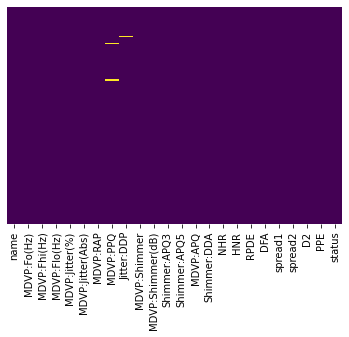

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
df['MDVP:PPQ'].fillna(df['MDVP:PPQ'].mean(),inplace=True)
df['Jitter:DDP'].fillna(df['Jitter:DDP'].mean(),inplace=True)

<AxesSubplot:>

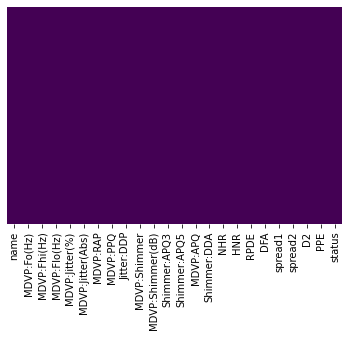

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='status', ylabel='count'>

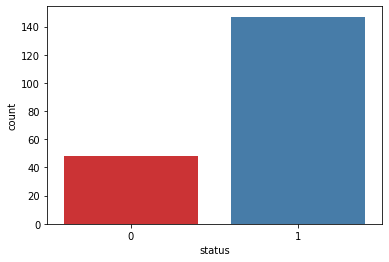

In [8]:
sns.countplot(x='status',data=df,palette='Set1')

## Scaling

In [9]:
scale=MinMaxScaler()

In [10]:
target=df['status']

In [11]:
df.drop(['name','status'],axis=1,inplace=True)

In [12]:
scale.fit(df)

MinMaxScaler()

In [13]:
new_df = scale.transform(df)
df_new = pd.DataFrame(new_df,columns=scale.feature_names_in_)

In [14]:
df_new

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,0.184308,0.112592,0.054815,0.195680,0.249012,0.145472,0.247588,0.145288,0.312215,0.280197,...,0.172448,0.332584,0.068307,0.511745,0.369155,0.960148,0.569875,0.585765,0.390661,0.497310
1,0.198327,0.094930,0.278323,0.254130,0.288538,0.191233,0.323687,0.191042,0.472887,0.444536,...,0.279424,0.516048,0.059331,0.432577,0.470830,0.977024,0.703277,0.741337,0.473145,0.671326
2,0.165039,0.059128,0.265288,0.280178,0.328063,0.229287,0.369239,0.229411,0.390634,0.326212,...,0.219848,0.443317,0.039596,0.496220,0.404416,1.000000,0.636745,0.686371,0.408819,0.596682
3,0.165004,0.072927,0.264200,0.263342,0.328063,0.209056,0.324759,0.208862,0.414278,0.354971,...,0.233785,0.475478,0.040997,0.495936,0.416255,0.975885,0.695627,0.738089,0.436977,0.671949
4,0.161150,0.080909,0.260107,0.354511,0.407115,0.282755,0.437299,0.282870,0.499452,0.410025,...,0.286852,0.584542,0.054174,0.455499,0.375159,0.992813,0.762472,0.513798,0.404336,0.757611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.499820,0.262986,0.165722,0.092440,0.090909,0.093931,0.089496,0.094076,0.286014,0.262942,...,0.155142,0.362306,0.085909,0.450134,0.447684,0.333127,0.257894,0.260408,0.549049,0.183318
191,0.705488,0.307974,0.138243,0.125794,0.090909,0.126686,0.107181,0.126826,0.164050,0.146261,...,0.088828,0.221338,0.055543,0.435097,0.408567,0.434101,0.319956,0.276956,0.605474,0.257558
192,0.502730,0.281413,0.050727,0.378653,0.288538,0.267823,0.252947,0.267940,0.123608,0.140509,...,0.072594,0.156631,0.338988,0.383728,0.352318,0.324299,0.212945,0.342577,0.558967,0.180580
193,0.642893,0.601807,0.054279,0.181703,0.130435,0.145472,0.159700,0.145288,0.122512,0.128184,...,0.066544,0.155989,0.227838,0.429936,0.454176,0.277579,0.220650,0.452885,0.318222,0.163137


In [15]:
df_new.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.383623,0.193841,0.292748,0.144233,0.146083,0.126513,0.136539,0.126704,0.184126,0.162080,...,0.129347,0.214101,0.077019,0.546410,0.564574,0.572963,0.412332,0.495783,0.426421,0.335549
std,0.240959,0.186761,0.250564,0.154007,0.137636,0.142956,0.147420,0.142906,0.172147,0.160129,...,0.129771,0.195527,0.128652,0.179865,0.242525,0.220456,0.197110,0.187758,0.170294,0.186649
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.170220,0.066786,0.108323,0.056544,0.051383,0.047206,0.051983,0.047279,0.063584,0.052177,...,0.045103,0.071222,0.016790,0.437170,0.384375,0.400291,0.273893,0.378364,0.300658,0.192433
50%,0.351961,0.150411,0.223606,0.103558,0.090909,0.087669,0.098071,0.087494,0.122604,0.111750,...,0.084769,0.158685,0.035045,0.554499,0.558550,0.589516,0.405738,0.478618,0.417393,0.309661
75%,0.549775,0.249162,0.429160,0.180591,0.209486,0.151975,0.162647,0.151951,0.258764,0.217749,...,0.170074,0.302703,0.079543,0.676034,0.772299,0.747391,0.527720,0.614472,0.539698,0.431709
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Decision Tree Classifier

In [16]:
X=df_new
y=target

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=5)

In [18]:
dtc=DecisionTreeClassifier(criterion="entropy",splitter="random")

In [19]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', splitter='random')

In [20]:
y_pred=dtc.predict(X_test)

In [21]:
print('Scores :-\n')
print('Train:  ',dtc.score(X_train,y_train))
print('Test:  ',dtc.score(X_test,y_test))
print('Accuracy:  ',accuracy_score(y_test,y_pred))

Scores :-

Train:   1.0
Test:   0.8367346938775511
Accuracy:   0.8367346938775511


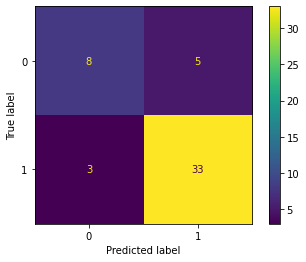

In [22]:
cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot()

## Random Forests

In [23]:
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [24]:
rfc_pred = rfc.predict(X_test)

In [25]:
print('Scores :-\n')
print('Train:  ',rfc.score(X_train,y_train))
print('Test:  ',rfc.score(X_test,y_test))
print('Accuracy:  ',accuracy_score(y_test,rfc_pred))

Scores :-

Train:   1.0
Test:   0.8979591836734694
Accuracy:   0.8979591836734694


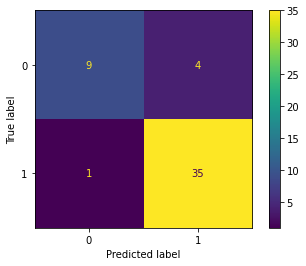

In [26]:
cm = confusion_matrix(y_test,rfc_pred)
ConfusionMatrixDisplay(cm).plot()

## Logistic Regression

In [27]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [28]:
lr_pred=lr.predict(X_test)

In [29]:
print('Scores :-\n')
print('Train:  ',lr.score(X_train,y_train))
print('Test:  ',lr.score(X_test,y_test))
print('Accuracy:  ',accuracy_score(y_test,lr_pred))

Scores :-

Train:   0.8698630136986302
Test:   0.8367346938775511
Accuracy:   0.8367346938775511


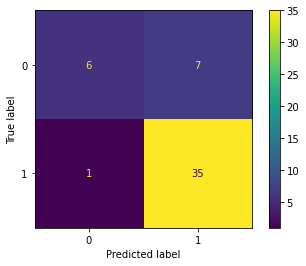

In [30]:
cm = confusion_matrix(y_test,lr_pred)
ConfusionMatrixDisplay(cm).plot()

#### Hence Random Forest is the best model for prediction